In [46]:
"""Author: Sameer Vajjala Kesava

Predicting direction of stock market.

Fitting Logistic Regression to the complete dataset and deriving statistics.
No Cross Validation employed (yet).

Problem statement from Chapter 4
Book: An Introduction to Statistical Learning with Applications in R, 
       Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani

Dataset: Smarket (downloaded from https://www-bcf.usc.edu/~gareth/ISL/ and converted to csv)

Packages used: numpy, pandas, sklearn and scipy"""

'Author: Sameer Vajjala Kesava\nChapter 4:Lab - Predicting direction of stock market\nBook: An Introduction to Statistical Learning with Applications in R, \n       Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani\nDataset: Smarket (downloaded from https://www-bcf.usc.edu/~gareth/ISL/ and converted to csv)\nNo Cross Validation employed (yet).\nFitting Logistic Regression and deriving statistics.\nPackages used: numpy, pandas, sklearn and scipy'

In [2]:
import pandas as pd
import numpy as np

In [ ]:
pd.options.display.max_columns = 100

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
data_df = pd.read_csv("Smarket")
print(data_df.head(10))

   Unnamed: 0    Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today  \
0           1  2001.0  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959   
1           2  2001.0  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032   
2           3  2001.0  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623   
3           4  2001.0 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614   
4           5  2001.0  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213   
5           6  2001.0  0.213  0.614 -0.623  1.032  0.959  1.3491  1.392   
6           7  2001.0  1.392  0.213  0.614 -0.623  1.032  1.4450 -0.403   
7           8  2001.0 -0.403  1.392  0.213  0.614 -0.623  1.4078  0.027   
8           9  2001.0  0.027 -0.403  1.392  0.213  0.614  1.1640  1.303   
9          10  2001.0  1.303  0.027 -0.403  1.392  0.213  1.2326  0.287   

  Direction  
0        Up  
1        Up  
2      Down  
3        Up  
4        Up  
5        Up  
6      Down  
7        Up  
8        Up  
9        Up  


In [4]:
data_df.drop(columns='Unnamed: 0', inplace=True)
print(data_df.head(5))

     Year   Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Today Direction
0  2001.0  0.381 -0.192 -2.624 -1.055  5.010  1.1913  0.959        Up
1  2001.0  0.959  0.381 -0.192 -2.624 -1.055  1.2965  1.032        Up
2  2001.0  1.032  0.959  0.381 -0.192 -2.624  1.4112 -0.623      Down
3  2001.0 -0.623  1.032  0.959  0.381 -0.192  1.2760  0.614        Up
4  2001.0  0.614 -0.623  1.032  0.959  0.381  1.2057  0.213        Up


In [5]:
print('Dimensions of the dataframe: ', data_df.shape)

Dimensions of the dataframe:  (1250, 9)


In [6]:
print('Summary: \n', data_df.describe())

Summary: 
               Year         Lag1         Lag2         Lag3         Lag4  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean   2003.016000     0.003834     0.003919     0.001716     0.001636   
std       1.409018     1.136299     1.136280     1.138703     1.138774   
min    2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25%    2002.000000    -0.639500    -0.639500    -0.640000    -0.640000   
50%    2003.000000     0.039000     0.039000     0.038500     0.038500   
75%    2004.000000     0.596750     0.596750     0.596750     0.596750   
max    2005.000000     5.733000     5.733000     5.733000     5.733000   

             Lag5       Volume        Today  
count  1250.00000  1250.000000  1250.000000  
mean      0.00561     1.478305     0.003138  
std       1.14755     0.360357     1.136334  
min      -4.92200     0.356070    -4.922000  
25%      -0.64000     1.257400    -0.639500  
50%       0.03850     1.422950     0.038500  


In [7]:
print(data_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
Year         1250 non-null float64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(8), object(1)
memory usage: 88.0+ KB
None


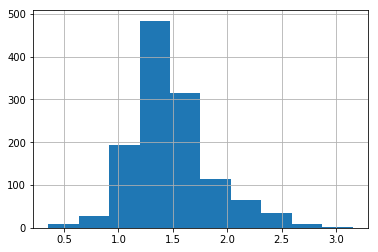

In [45]:
#pandas itself has plotting functions. Can use matplotlib or seaborn for statistical plotting
import matplotlib.pyplot as plt
data_df['Volume'].hist()

In [9]:
#models
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

#### Checking correlations between different variables

In [10]:
#different methods available.
#automatically ignores non-numeric variables
print(data_df.corr(method='pearson'))

            Year      Lag1      Lag2      Lag3      Lag4      Lag5    Volume  \
Year    1.000000  0.029700  0.030596  0.033195  0.035689  0.029788  0.539006   
Lag1    0.029700  1.000000 -0.026294 -0.010803 -0.002986 -0.005675  0.040910   
Lag2    0.030596 -0.026294  1.000000 -0.025897 -0.010854 -0.003558 -0.043383   
Lag3    0.033195 -0.010803 -0.025897  1.000000 -0.024051 -0.018808 -0.041824   
Lag4    0.035689 -0.002986 -0.010854 -0.024051  1.000000 -0.027084 -0.048414   
Lag5    0.029788 -0.005675 -0.003558 -0.018808 -0.027084  1.000000 -0.022002   
Volume  0.539006  0.040910 -0.043383 -0.041824 -0.048414 -0.022002  1.000000   
Today   0.030095 -0.026155 -0.010250 -0.002448 -0.006900 -0.034860  0.014592   

           Today  
Year    0.030095  
Lag1   -0.026155  
Lag2   -0.010250  
Lag3   -0.002448  
Lag4   -0.006900  
Lag5   -0.034860  
Volume  0.014592  
Today   1.000000  


#### Logistic Regression to predict stock market direction

In [11]:
#Direction as a function of Lag1 to Lag5 and Volume
logreg =  LogisticRegression()

In [12]:
data_1 = data_df.drop(columns = ['Year', 'Today'])
data_1.head(5)

,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Direction
0,0.381,-0.192,-2.624,-1.055,5.010,1.1913,Up
1,0.959,0.381,-0.192,-2.624,-1.055,1.2965,Up
2,1.032,0.959,0.381,-0.192,-2.624,1.4112,Down
3,-0.623,1.032,0.959,0.381,-0.192,1.2760,Up
4,0.614,-0.623,1.032,0.959,0.381,1.2057,Up


In [13]:
label_encoder = LabelEncoder()

In [14]:
# encoding Direction with numeric values
encoded_direction = label_encoder.fit_transform(data_1['Direction'])
print('Encoded Direction: ', encoded_direction)

Encoded Direction:  [1 1 0 ... 1 0 0]


In [15]:
print('Encoded Classes: ', label_encoder.classes_)

Encoded Classes:  ['Down' 'Up']


In [16]:
data_1.Direction =  encoded_direction

In [17]:
print(data_1.head(5))

    Lag1   Lag2   Lag3   Lag4   Lag5  Volume  Direction
0  0.381 -0.192 -2.624 -1.055  5.010  1.1913          1
1  0.959  0.381 -0.192 -2.624 -1.055  1.2965          1
2  1.032  0.959  0.381 -0.192 -2.624  1.4112          0
3 -0.623  1.032  0.959  0.381 -0.192  1.2760          1
4  0.614 -0.623  1.032  0.959  0.381  1.2057          1


In [18]:
x_true = data_1.drop(columns = 'Direction')
y_true = data_1[['Direction']]


In [19]:
#Did not have to convert 'Direction' into category type
fit_data_1 = logreg.fit(X = x_true, y = y_true['Direction'])

/home/sameer/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [20]:
print('Parameter coefficients: ', fit_data_1.coef_)

Parameter coefficients:  [[-0.07279035 -0.04229102  0.010958    0.00921799  0.01023031  0.12793931]]


In [21]:
print('Intercept: ', fit_data_1.intercept_)

Intercept:  [-0.11454962]


In [22]:
print('Classes: ', fit_data_1.classes_)

Classes:  [0 1]


In [23]:
print('Regression parameters: ', fit_data_1.get_params())

Regression parameters:  {'max_iter': 100, 'intercept_scaling': 1, 'warm_start': False, 'n_jobs': None, 'class_weight': None, 'tol': 0.0001, 'dual': False, 'multi_class': 'warn', 'verbose': 0, 'random_state': None, 'penalty': 'l2', 'fit_intercept': True, 'C': 1.0, 'solver': 'warn'}


In [24]:
"""Calculating statistics of the fit"""

'Calculating statistics of the fit'

In [25]:
newX = pd.DataFrame({"Constant":np.ones(len(x_true))}).join(pd.DataFrame(x_true))

In [26]:
#Predicted probabilities: 0: Down, 1: Up
pred_prob = fit_data_1.predict_proba(data_1.drop(columns = 'Direction'))

In [27]:
#Calculating variance matrix
Variance = np.diagflat(np.prod(pred_prob, axis = 1), k = 0)

In [28]:
#Calculating Covariance Matrix of the fit: (X$_{T}$VX)-1
Covariance_matrix = np.linalg.inv(np.dot(np.dot(newX.values.transpose(), Variance), newX.values))
print('Convariance Matrix: \n', Covariance_matrix)

Convariance Matrix: 
 [[ 5.79382512e-02  4.71315852e-04 -5.09896429e-04 -5.13174016e-04
  -5.91547977e-04 -2.89314768e-04 -3.70390958e-02]
 [ 4.71315852e-04  2.51650524e-03  7.39971276e-05  2.60134189e-05
   4.49550788e-06  1.13249384e-05 -3.32054166e-04]
 [-5.09896429e-04  7.39971276e-05  2.50844845e-03  7.22410854e-05
   3.50818755e-05  1.30543137e-05  3.33861161e-04]
 [-5.13174016e-04  2.60134189e-05  7.22410854e-05  2.49372157e-03
   6.85130712e-05  5.16067919e-05  3.43147061e-04]
 [-5.91547977e-04  4.49550788e-06  3.50818755e-05  6.85130712e-05
   2.49725455e-03  7.16720149e-05  3.97305741e-04]
 [-2.89314768e-04  1.13249384e-05  1.30543137e-05  5.16067919e-05
   7.16720149e-05  2.45127629e-03  1.86157254e-04]
 [-3.70390958e-02 -3.32054166e-04  3.33861161e-04  3.43147061e-04
   3.97305741e-04  1.86157254e-04  2.50690884e-02]]


In [29]:
print('Dimensions: ', Covariance_matrix.shape)

Dimensions:  (7, 7)


In [30]:
std_err = np.sqrt(np.diagonal(Covariance_matrix))
print('Standard Error of the coefficients: ', std_err)

Standard Error of the coefficients:  [0.24070366 0.05016478 0.05008441 0.04993718 0.04997254 0.04951037
 0.15833221]


In [31]:
z_value = np.append(fit_data_1.intercept_, fit_data_1.coef_)/std_err

In [32]:
print('Z scores of the fit: ' , z_value)

Z scores of the fit:  [-0.47589482 -1.45102503 -0.84439475  0.21943564  0.18446115  0.20662968
  0.80804348]


In [33]:
"""Calculating p-values from Z scores"""

'Calculating p-values from Z scores'

In [34]:
import scipy.stats as st

In [35]:
# Works with either two-sided survival function or from cdf of t-distribution
p_values_sf =  st.norm.sf(np.abs(z_value))*2 #two-sided
print('p values using Survival function:', p_values_sf)

p values using Survival function: [0.63414931 0.14677289 0.39844885 0.82631071 0.8536517  0.83629908
 0.41906555]


In [36]:
#assuming t-distribution, probably the right to use. Have to pass absolute values to the cdf function
p_values_t_distr = 2*(1-st.t.cdf(np.abs(z_value),len(newX.values)-1))
print('p-values using cdf from t-distribution: ', p_values_t_distr)

p-values using cdf from t-distribution:  [0.63423254 0.14702399 0.39861056 0.82634656 0.85368165 0.83633276
 0.41921942]


In [37]:
#Compiling all the derived statistics as a Dataframe
coeff_stats = pd.DataFrame(data=np.transpose([np.append(fit_data_1.intercept_, fit_data_1.coef_),std_err, z_value, p_values_t_distr]),\
                          index = ['Intercept'] + list(x_true.columns), columns = ['Estimate', 'Std. Error', 'z value', 'Pr(>|z|)'])
print(coeff_stats)

           Estimate  Std. Error   z value  Pr(>|z|)
Intercept -0.114550    0.240704 -0.475895  0.634233
Lag1      -0.072790    0.050165 -1.451025  0.147024
Lag2      -0.042291    0.050084 -0.844395  0.398611
Lag3       0.010958    0.049937  0.219436  0.826347
Lag4       0.009218    0.049973  0.184461  0.853682
Lag5       0.010230    0.049510  0.206630  0.836333
Volume     0.127939    0.158332  0.808043  0.419219


In [38]:
"""Calculating Confusion Matrix"""

'Calculating Confusion Matrix'

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
cm =  confusion_matrix(data_1['Direction'].values, fit_data_1.predict(x_true))

In [41]:
cmdf = pd.DataFrame(cm, index = [list(y_true.columns)*y_true.nunique()[0], label_encoder.classes_],\
                    columns = [['Predicted']*y_true.nunique()[0], label_encoder.classes_])

In [42]:
print('Confusion Matrix: \n', cmdf)

Confusion Matrix: 
                Predicted     
                    Down   Up
Direction Down       143  459
          Up         135  513


In [43]:
"""Prediction Accuracy"""

'Prediction Accuracy'

In [44]:
print('Training error rate is {0:.2%}'.format(1 - fit_data_1.score(x_true,y_true)))

Training error rate is 47.52%
